In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
ls

code.ipynb  logistic_regression.py  spambase.data  spambase.names


In [3]:
d = 58 # 57 input attributes + 1 target label

labels = ['f' + str(i) for i in range(1, d)]
labels.append('t')

labels

['f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 't']

In [4]:
data = pd.read_csv('spambase.data', header = None)

data.columns = labels

In [5]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f49,f50,f51,f52,f53,f54,f55,f56,f57,t
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [6]:
target = data['t']
data = data.drop(columns = 't')
d -= 1

In [7]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.0,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.0,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.0,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749


In [8]:
target.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: t, dtype: int64

In [9]:
# normalizing the feature values by dividing each column by its mean

for col in data.columns:
    column = data[col]
    
    mean = 0
    for val in column:
        mean += val
    mean = mean/(len(column) + 0.0)
    
    new_column = []
    
    for val in column:
        new_column.append(val / mean)
        
    data[col] = new_column     

In [10]:
data.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57
0,0.000000,3.004489,2.280369,0.0,1.024907,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,2.891432,0.000000,0.000000,0.723488,1.169192,0.981329
1,2.008544,1.314464,1.781538,0.0,0.448397,2.919681,1.838754,0.664802,0.000000,3.926267,...,0.0,0.000000,0.949432,0.0,1.382535,2.374335,1.085035,0.985069,1.935875,3.628799
2,0.573870,0.000000,2.529784,0.0,3.939487,1.981212,1.663634,1.139661,7.105792,1.044220,...,0.0,0.259238,1.028552,0.0,1.025752,2.427098,0.226049,1.891741,9.296034,7.974181
3,0.000000,0.000000,0.000000,0.0,2.017786,0.000000,2.714351,5.983218,3.441868,2.631434,...,0.0,0.000000,0.985396,0.0,0.509160,0.000000,0.000000,0.681304,0.766683,0.674222
4,0.000000,0.000000,0.000000,0.0,2.017786,0.000000,2.714351,5.983218,3.441868,2.631434,...,0.0,0.000000,0.971010,0.0,0.501727,0.000000,0.000000,0.681304,0.766683,0.674222
5,0.000000,0.000000,0.000000,0.0,5.925244,0.000000,0.000000,17.569768,0.000000,0.000000,...,0.0,0.000000,1.603965,0.0,0.000000,0.000000,0.000000,0.577866,0.287506,0.190618
6,0.000000,0.000000,0.000000,0.0,6.149442,0.000000,0.000000,0.000000,0.000000,2.673203,...,0.0,0.000000,0.388404,0.0,0.609505,0.712301,0.000000,0.321871,0.076668,0.395356
7,0.000000,0.000000,0.000000,0.0,6.021329,0.000000,0.000000,17.854684,0.000000,0.000000,...,0.0,0.000000,1.481690,0.0,0.000000,0.000000,0.000000,0.471924,0.210838,0.172968
8,1.434674,0.000000,1.639015,0.0,1.953729,0.000000,2.626791,0.000000,10.214575,3.174429,...,0.0,0.000000,1.949214,0.0,0.672685,2.677723,0.497308,1.876909,8.529351,4.437160
9,0.573870,0.563342,2.743568,0.0,0.608539,3.336778,3.327269,0.000000,0.666168,0.000000,...,0.0,1.036950,0.215780,0.0,0.906824,1.068451,0.000000,0.333043,0.824184,2.643940


In [11]:
# relabeling targets .ie. {1 - spam, 0 - not spam} (old) ----> {1,-1} (new)

new_target = target

for i in range(0, len(new_target)):
    if new_target[i] == 1:
        new_target[i] = 1
    else:
        new_target[i] = -1

target = pd.DataFrame(new_target, columns = ['t'])

# new_target = []

# for val in target['t']:
#     if val == 1:
#         new_target.append(1)
#     else:
#         new_target.append(-1)

# target = pd.DataFrame(new_target, columns = ['t'])

In [12]:
target.head(10)

,t
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [13]:
target['t'].unique()

array([ 1, -1])

In [14]:
import math, random

def train_test_split(X, y, f):
    # f : fraction of samples taken for training; in the range (0,1)
    n = X.shape[0]
    m = math.floor(f * n)
    row_indices = [i for i in range(0, X.shape[0])]

    random.shuffle(row_indices)
    test_rows = row_indices[0:n-m]

    train_rows = [i for i in range(0, m)]
    
    X_test = pd.DataFrame(columns = labels[0:len(labels)-1])
    y_test = pd.DataFrame(columns = ['t'])
    
    for row in test_rows:
        X_test.loc[len(X_test)] = X.iloc[row]
        y_test.loc[len(y_test)] = y.iloc[row]
    
    X_train = pd.DataFrame(X.drop(X.index[test_rows]))
    y_train = pd.DataFrame(y.drop(y.index[test_rows]))
    
    return X_train, X_test, y_train, y_test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 0.9)

In [16]:
X_train.shape

(4140, 57)

In [17]:
X_test.shape

(461, 57)

In [18]:
y_train.shape

(4140, 1)

In [19]:
y_test.shape

(461, 1)

In [20]:
import math

def sigmoid(x):
    if x < 0:
        return 1 - 1 / (1 + math.exp(x))
    else:
        return 1 / (1 + math.exp(-x))

In [21]:
def logistic_loss(w, X, y):
    loss = 0
    for i in range(0, X.shape[0]):
        x_i = X.iloc[i]
        y_i = y.iloc[i-1, 0]
        loss += sigmoid(-y_i * float(np.inner(w, x_i)))
#         loss += np.log(1 + np.exp(-1 * float(y_i * (np.inner(w, x_i)))))    
    loss /= X_test.shape[0]
    return loss

In [22]:
def gradient(w, X, y):
    grad = np.zeros((1,d))
    for i in range(0, X.shape[0]):
        x_i = X[i, :]
        y_i = y.iloc[i-1, 0]
        h = float(np.inner(w, x_i))
        grad += (1 - sigmoid(h)) * -1 * y_i * x_i   
    grad /= X_test.shape[0]
    return grad

In [23]:
import random
import numpy as np

loss_training = []
loss_test = []

def gradient_descent(X, y, m, d):
    w_opt = np.zeros((1,d))
    iterations = 500
    learning_rate = 0.1
    w = np.zeros((1,d))
    w_opt = w 
    for i in range(iterations):
        w = w - learning_rate * gradient(w, X, y)
        w_opt += w
        loss_training.append(logistic_loss(w, X_train, y_train))
        loss_test.append(logistic_loss(w, X_test, y_test))
    w_opt /= iterations
    return w_opt        

In [24]:
def fit(X_train, y_train):
    """
    Finds the appropriate parameters (w,b)
    :param X_train: the training examples 
    :param y_train: the corresponding targets
    :return:   
    """
    # dim(X_train) : m x d 
    # dim(y_train) : m x 1 
    
    m = y_train.shape[0] # number of samples
    d = X_train.shape[1] # size of feature space
    
#     ones = np.ones((m,1)) # for affine to homogeneous conversion
    
#     X = np.hstack((X_train, ones)) # dim : m x (d+1) 
    X = X_train.to_numpy() # dim : m x d
    y = y_train # dim : m x 1 
    
    w_opt = gradient_descent(X, y, m, d)

    return w_opt

In [25]:
w_opt = fit(X_train, y_train)

In [26]:
w_opt

array([[-3.80771572e+01, -1.24296015e+02, -3.56344264e+01,
         1.41975425e+01, -5.12458181e+00,  2.72304584e-02,
         5.41590481e+01,  2.12334999e+01,  1.54463581e+01,
        -2.47185849e+01,  1.90751017e+01, -8.69958485e+01,
        -2.14614735e+01, -2.24419738e+01,  3.29463081e+01,
         3.67608070e+01,  1.50254362e+01,  8.00781432e+00,
        -4.09805605e+01,  2.58913388e+01, -1.55031273e+00,
         5.93058390e+00,  4.69750024e+01,  4.91694514e+01,
        -2.20249895e+02, -2.21203254e+02, -2.19521258e+02,
        -1.98140572e+02, -2.24170414e+02, -2.15222920e+02,
        -2.14874436e+02, -2.25054285e+02, -1.95752439e+02,
        -2.21120141e+02, -2.17581297e+02, -1.71379861e+02,
        -1.67476603e+02, -1.74704036e+02, -1.98859211e+02,
        -1.40502291e+02, -2.34508431e+02, -2.28207349e+02,
        -2.03640407e+02, -2.07732727e+02, -1.61623003e+02,
        -2.12047039e+02, -2.00522521e+02, -2.08518236e+02,
        -1.41168132e+02, -1.13092420e+02, -1.50441334e+0

In [27]:
from numpy import linalg as la
la.norm(w_opt)

1053.115364305959

In [28]:
# loss = 0
# for i in range(0, X_test.shape[0]):
#     x_i = X_test.iloc[i]
#     y_i = y_test.iloc[i-1, 0]
#     loss += max(0, 1 - (y_i * np.inner(w_opt, x_i)))    
# loss /= X_test.shape[0]

In [29]:
# loss = 0
# for i in range(0, X_train.shape[0]):
#     x_i = X_train.iloc[i]
#     y_i = y_train.iloc[i-1, 0]
#     loss += max(0, 1 - (y_i * np.inner(w_opt, x_i)))    
# loss /= X_train.shape[0]

In [30]:
# loss

In [31]:
loss_test

[0.4494580359513725,
 0.4486982996951864,
 0.44637152625688126,
 0.4540292259029822,
 0.45403090042426447,
 0.45598998159873644,
 0.45714357752097134,
 0.45779900131272094,
 0.45815357240777776,
 0.4581900096328507,
 0.458276494618405,
 0.4582745808280069,
 0.4582068713908173,
 0.458084271760112,
 0.45796475977662543,
 0.45782983983608955,
 0.4576698815793088,
 0.457506266281176,
 0.4573418953608994,
 0.4571770380450099,
 0.4570125189151891,
 0.4568574387117585,
 0.4566906683310413,
 0.45653001168005547,
 0.45637544030919264,
 0.4562341934773569,
 0.4560894596778525,
 0.45595235441123916,
 0.45583158155159603,
 0.45570597828952886,
 0.45558813650396845,
 0.4554776078192756,
 0.455382841977806,
 0.4552829159451162,
 0.45518958730574555,
 0.4551023107736278,
 0.4550209055092653,
 0.4549524464377104,
 0.45487847452771324,
 0.45480932049321693,
 0.4547445346805231,
 0.4546837342002463,
 0.4546271964409543,
 0.4545772069197346,
 0.45452548305752866,
 0.45447677310990753,
 0.4544308272408813

In [32]:
loss_training

[1.2988532108833124,
 1.9208303344604118,
 2.1683773389162133,
 1.9405666666530228,
 2.042948192868226,
 2.0189860957887085,
 2.017882075505696,
 2.0201803493933137,
 2.022296457859349,
 2.0261030705835728,
 2.0242278441361607,
 2.0233162219662524,
 2.0230031417675787,
 2.0255692127368388,
 2.0249798560459,
 2.023076296686435,
 2.027722835089066,
 2.026900922280093,
 2.026579063238276,
 2.026532579866101,
 2.0252228234512235,
 2.0285004435265903,
 2.028184095988916,
 2.0280848883796314,
 2.0271339239939117,
 2.029214324376094,
 2.0290903546098793,
 2.0277672058319056,
 2.030377734131447,
 2.0301739305121402,
 2.03009220510679,
 2.0285398476800185,
 2.0314864603417995,
 2.031279502257769,
 2.0311852429594586,
 2.031108172777237,
 2.029366917488791,
 2.032740845601634,
 2.032542188953013,
 2.0324385761901613,
 2.032406171201005,
 2.0322347304035433,
 2.031292086373832,
 2.0335288614224885,
 2.03346281314621,
 2.0334462207684,
 2.03210479168663,
 2.0343834697022696,
 2.034323455558493,
 2

In [33]:
iterations = [i for i in range(1,500+1)]
loss = [loss_training, loss_test]

In [34]:
# import matplotlib.pyplot as plt 
 
# plt.plot(iterations, loss_training, color='blue', linewidth=2, label='Training loss') 
# plt.plot(iterations, loss_test, color='red', linewidth=2, label='True loss') 
# plt.xlabel('iterations')
# plt.ylabel('error') 
  
# # giving a title to my graph 
# plt.title('Error vs iterations') 

# plt.legend()

# # function to show the plot 
# plt.show()


# plt.plot( 'x', 'y1', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
# plt.plot( 'x', 'y2', data=df, marker='', color='olive', linewidth=2)
# plt.plot( 'x', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")
# plt.legend()


In [35]:
import matplotlib.pyplot as plt 
 
plt.plot(iterations, loss_training, color='blue')
plt.xlabel('iterations')
plt.ylabel('Training error') 
  
# giving a title to my graph 
plt.title('Training error vs iterations') 

# plt.legend()

# function to show the plot 
plt.show()

<Figure size 640x480 with 1 Axes>

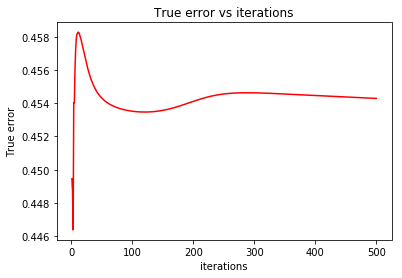

In [36]:
import matplotlib.pyplot as plt 
 
plt.plot(iterations, loss_test, color='red') 
plt.xlabel('iterations')
plt.ylabel('True error') 
  
# giving a title to my graph 
plt.title('True error vs iterations') 

# plt.legend()

# function to show the plot 
plt.show()

In [37]:
logistic_loss(w_opt, X_test, y_test)

0.45470119961668753